In [1]:
import numpy as np, pandas as pd
import os,glob, re

dfs = {re.search('/([^/\.]*)\.csv', fn).group(1):pd.read_csv(fn) for fn in glob.glob(os.getcwd()+'/Raw/*.csv')}
print('data frames read:{}'.format(list(dfs.keys())))

print('local variables with the same names are created.')
for k, v in dfs.items(): locals()[k] = v

data frames read:['air_reserve', 'air_store_info', 'air_visit_data', 'date_info', 'hpg_reserve', 'hpg_store_info', 'sample_submission', 'store_id_relation']
local variables with the same names are created.


In [2]:
air_store_info.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [3]:
sample_submission['air_store_id'] = sample_submission.id.str[:20]
sample_submission.head()

,id,visitors,air_store_id
0,air_00a91d42b08b08d9_2017-04-23,0,air_00a91d42b08b08d9
1,air_00a91d42b08b08d9_2017-04-24,0,air_00a91d42b08b08d9
2,air_00a91d42b08b08d9_2017-04-25,0,air_00a91d42b08b08d9
3,air_00a91d42b08b08d9_2017-04-26,0,air_00a91d42b08b08d9
4,air_00a91d42b08b08d9_2017-04-27,0,air_00a91d42b08b08d9


In [4]:
sample_submission[sample_submission['air_store_id'].isin(air_store_info.air_store_id.unique())].shape

(32019, 3)

In [5]:
import seaborn as sns
%matplotlib inline

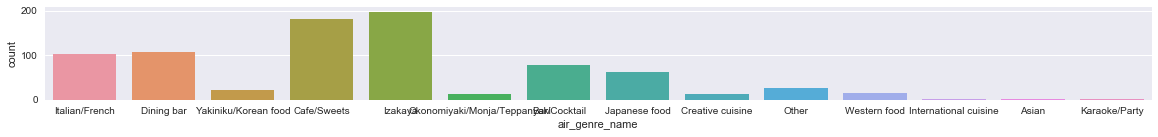

In [6]:
sns.factorplot(x = 'air_genre_name', data = air_store_info,kind="count",size=2, aspect=8)

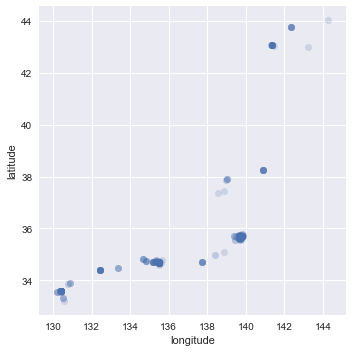

In [7]:
sns.lmplot(x='longitude', y='latitude', fit_reg= False,data = air_store_info,scatter_kws={'alpha':.1},size=5, aspect=1)

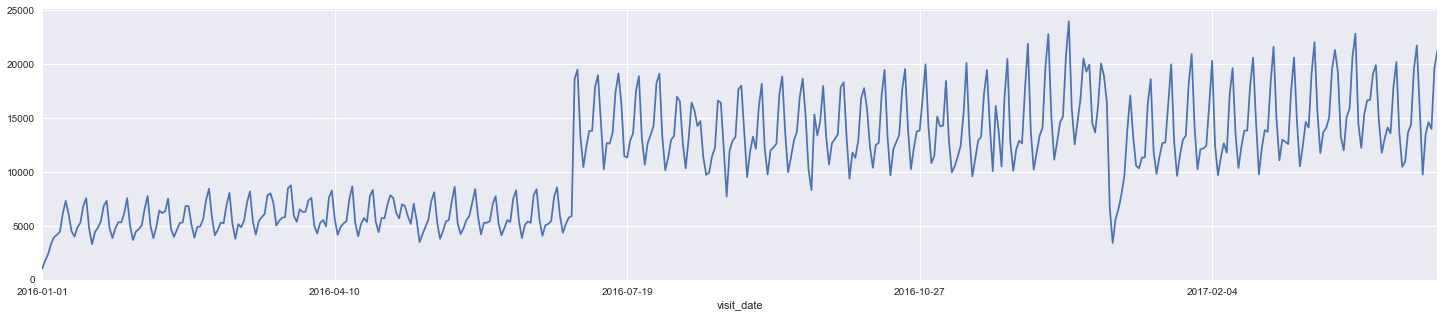

In [8]:
air_visit_data.groupby('visit_date')['visitors'].sum().plot(figsize =(25,5))

In [9]:
air_visit_data['visit_date'] = pd.to_datetime(air_visit_data['visit_date'])

In [16]:
req_dates = (air_visit_data['visit_date'] > pd.to_datetime('2016-04-21')) & (air_visit_data['visit_date'] < pd.to_datetime('2016-05-29'))

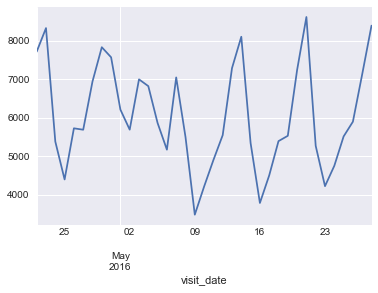

In [17]:
air_visit_data[req_dates].groupby('visit_date')['visitors'].sum().plot()

In [18]:
req_stores_visits = pd.DataFrame(sample_submission['air_store_id']).merge(air_visit_data,on = 'air_store_id',how = 'left')

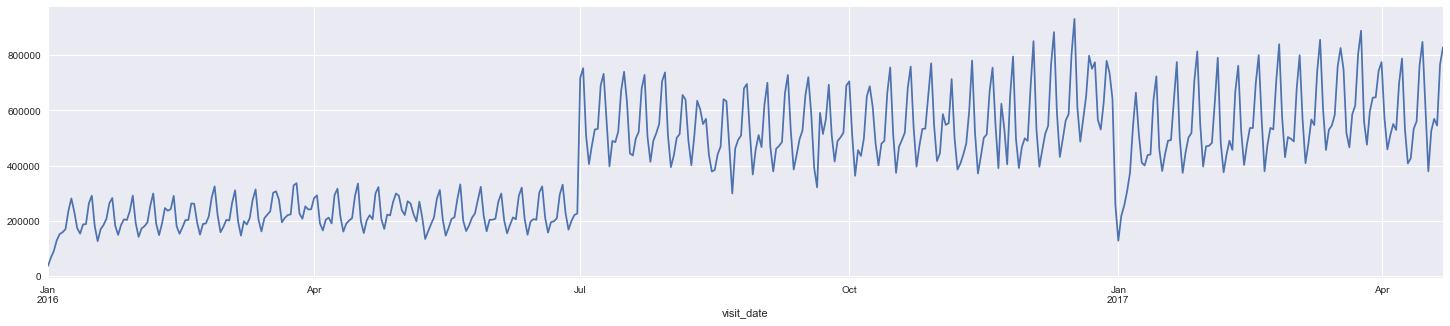

In [19]:
req_stores_visits.groupby('visit_date')['visitors'].sum().plot(figsize = (25,5))

In [41]:
air_visit_data['month'] = air_visit_data.visit_date.dt.month
air_visit_data['year'] = air_visit_data.visit_date.dt.year

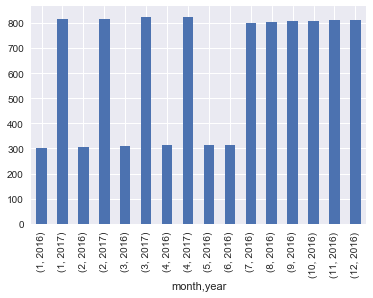

In [42]:
air_visit_data.groupby(['month','year'])['air_store_id'].nunique().plot(kind = 'bar')

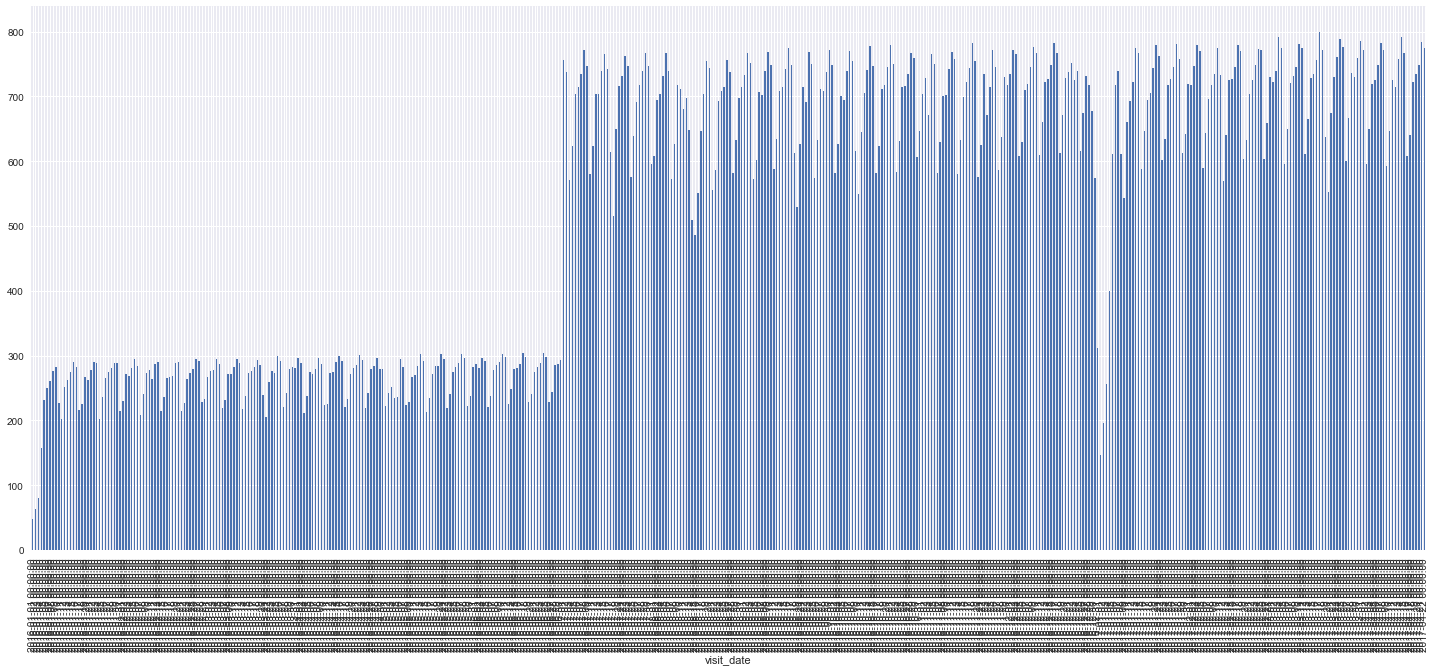

In [44]:
air_visit_data.groupby(['visit_date'])['air_store_id'].nunique().plot(kind = 'bar',figsize = (25,10))

In [45]:
req_stores_visits

,air_store_id,visit_date,visitors
0,air_00a91d42b08b08d9,2016-07-01,35
1,air_00a91d42b08b08d9,2016-07-02,9
2,air_00a91d42b08b08d9,2016-07-04,20
3,air_00a91d42b08b08d9,2016-07-05,25
4,air_00a91d42b08b08d9,2016-07-06,29
5,air_00a91d42b08b08d9,2016-07-07,34
6,air_00a91d42b08b08d9,2016-07-08,42
7,air_00a91d42b08b08d9,2016-07-09,11
8,air_00a91d42b08b08d9,2016-07-11,25
9,air_00a91d42b08b08d9,2016-07-12,24
